# Predicting the Price of Used Cars


# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

# Loading the raw data

In [3]:
df = pd.read_csv('car_price_data2.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Preprocessing

**Exploring the descriptive statistics of the variables**

In [4]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [5]:
# To check if there are any outliers
# Here we conclude that we don't have any outliers as the values are gradually increasing!
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
90%,2017.000000,9.500000,14.790000,65000.000000,0.000000
95%,2017.000000,14.500000,22.780000,80000.000000,0.000000
99%,2017.000000,23.000000,35.960000,142000.000000,1.000000


In [6]:
# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Check for any missing value in data set and treat it**

In [7]:
# checking missing value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Feature Extraction

In [8]:
# Creating a new feature called total no. of years old my car,bcz It's important to know how many years old the car is.
df['Car_age'] = 2021-df['Year']

#It's time to drop the Year column after the needed info is derived.
df.drop(labels='Year',axis=1,inplace=True)

In [9]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


# Data exploration

**Data Exploration & Visualization**

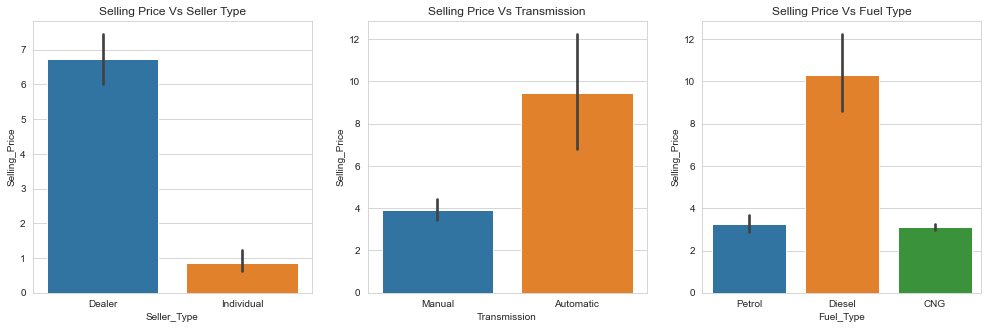

In [10]:
#Seller Type, Transmission nd Fuel Type Visualization with target variable
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(df['Seller_Type'], df['Selling_Price'])
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(df['Transmission'],df['Selling_Price'])
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(df['Fuel_Type'],df['Selling_Price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()


* Selling Price of cars seems to have higher prices when sold by Dealers when compared to Individuals *
* It can be observed that Selling Price would be higher for cars that are Automatic. *
* Selling Price of cars with Fuel Type of Diesel is higher than Petrol and CNG *

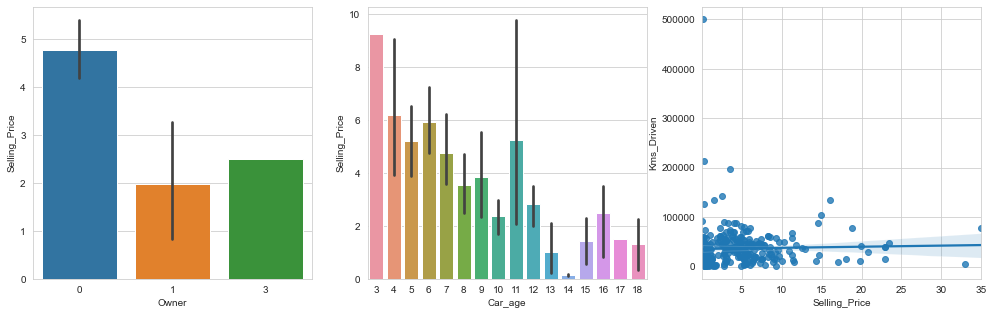

In [8]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(df['Owner'],df['Selling_Price'])

plt.subplot(1,3,2)
sns.barplot(df['Car_age'],df['Selling_Price'])

plt.subplot(1,3,3)
sns.regplot(df['Selling_Price'],df['Kms_Driven'])
plt.show()

* Selling Price is high with less Owners used Cars *
* Selling Price of cars 2 years old would be high and gradually decreases with car of 17 years old *
* Lesser the Kms driven higher the Selling Price * 

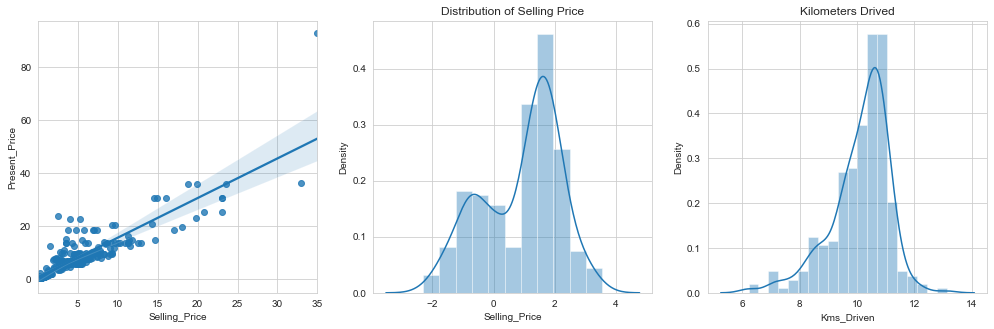

In [9]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.regplot(df['Selling_Price'],df['Present_Price'])

plt.subplot(1,3,2)
sns.distplot(np.log(df['Selling_Price']))
plt.title('Distribution of Selling Price')


plt.subplot(1,3,3)
sns.distplot(np.log(df['Kms_Driven']))
plt.title('Distribution of KMS Drived')


plt.title('Kilometers Drived')
plt.show()

* Selling Price tends to increase with increase in the Present Price of cars. *

**Dealing With Categorical Variables**

In [11]:
# Here's our categorical column
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Car_Name'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 

In [14]:
ft=pd.get_dummies(df['Fuel_Type'],drop_first=True)

In [15]:
st=pd.get_dummies(df['Seller_Type'],drop_first=True)

In [17]:
# In Car Name column There are three hundred and twelve unique name. 
# That's something really hard to implement and a regression that would mean more than 300 dummies, so we simply drop this column
df=df.drop(labels='Car_Name', axis=1)

In [16]:
t=pd.get_dummies(df["Transmission"],drop_first=True)

In [20]:
df=df.drop(labels=['Transmission','Fuel_Type','Seller_Type'], axis=1)

In [24]:
df=pd.concat([df,st,t,ft],axis=1)

In [25]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Individual,Manual,Diesel,Petrol
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,0,1,1,0
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,0,1,1,0


In [26]:
# Dealing With Categorical Variables, creagting dummies
clean_data = pd.get_dummies(df,drop_first=True)
clean_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Individual,Manual,Diesel,Petrol
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,0,1,1,0
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,0,1,1,0


# Checking Multicollinearity Using VIF

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Kms_Driven','Owner','Car_age','Diesel',
                        'Petrol','Individual','Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.204463,Present_Price
1,2.892740,Kms_Driven
2,1.087681,Owner
3,10.831000,Car_age
4,4.891105,Diesel
5,14.342446,Petrol
6,2.230725,Individual
7,8.392371,Manual


In [29]:
# Car_age nd fuel_type_petrol feature has high VIF
data_no_multicolinearity = clean_data.drop(['Car_age','Petrol'],axis=1)

In [31]:
# cheking again after removing some correlated feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Owner','Kms_Driven','Diesel',
                        'Individual','Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.200428,Present_Price
1,1.065887,Owner
2,1.883557,Kms_Driven
3,1.669188,Diesel
4,1.748669,Individual
5,2.465705,Manual


* Now its look good, We have VIF < 5 and hence there is no Multicollinearity occurrence in our model.*

In [32]:
data_no_multicolinearity.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Individual',
       'Manual', 'Diesel'],
      dtype='object')

In [18]:
# Selecting useful features.
final_df = data_no_multicolinearity[['Selling_Price', 'Present_Price', 'Car_age',
       'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Transmission_Manual']]

In [19]:
final_df.head()

,Selling_Price,Present_Price,Car_age,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,7,0,0,1
1,4.75,9.54,8,1,0,1
2,7.25,9.85,4,0,0,1
3,2.85,4.15,10,0,0,1
4,4.60,6.87,7,1,0,1


# Model Development

### Declaring dependent and independent variable

In [20]:
X = final_df.drop('Selling_Price', axis=1)
y = final_df['Selling_Price']

### Feature Scaling

In [21]:
# feature scallng on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['Present_Price','Car_age']])

StandardScaler()

In [22]:
input_scaled = scaler.transform(X[['Present_Price','Car_age']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','Car_age'])

In [23]:
X_scaled =scaled_data.join(X.drop(['Present_Price','Car_age'],axis=1))

### Training and Testing Data

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=365)

# Linear Regression Model

In [25]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)

R_squared : 0.8407655400238147


# Decision Tree Regressor

In [26]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
dr=DecisionTreeRegressor(random_state=0)
dr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [27]:
y_pred=dr.predict(x_test)
y_pred

array([ 4.        ,  5.25      ,  3.        ,  1.1       ,  4.7       ,
        0.17      ,  8.7875    ,  5.25      ,  0.45      ,  1.05      ,
        6.7       ,  1.15      , 19.99      ,  0.54      , 23.5       ,
       18.        ,  1.2       ,  4.5       ,  5.5       ,  3.49      ,
        4.35      ,  9.1       ,  0.45      ,  0.45      ,  0.45      ,
        0.25      ,  6.        ,  5.5       , 33.        , 14.25      ,
        5.5       ,  2.35      ,  1.05      ,  3.9       ,  7.75      ,
        4.8       ,  3.05      ,  6.25      ,  1.05      ,  8.35      ,
        3.5       ,  1.1       ,  8.99      ,  1.05      , 14.9       ,
        4.8       ,  9.1       ,  7.25      ,  9.83666667,  5.075     ,
        0.25      ,  0.78      ,  4.75      , 23.5       ,  4.        ,
        4.75      ,  3.        ,  4.75      ,  0.48      , 12.9       ,
        5.8       ])

[Text(607.2609375, 363.22363636363633, 'X[0] <= 2.264\nmse = 41.359\nsamples = 61\nvalue = 6.012'),
 Text(405.421875, 328.6309090909091, 'X[0] <= -0.265\nmse = 13.929\nsamples = 56\nvalue = 4.497'),
 Text(251.1, 294.0381818181818, 'X[0] <= -0.518\nmse = 0.651\nsamples = 21\nvalue = 1.02'),
 Text(181.35, 259.44545454545454, 'X[0] <= -0.756\nmse = 0.126\nsamples = 18\nvalue = 0.723'),
 Text(111.6, 224.85272727272724, 'X[1] <= -0.302\nmse = 0.057\nsamples = 11\nvalue = 0.484'),
 Text(69.75, 190.26, 'X[0] <= -0.78\nmse = 0.051\nsamples = 5\nvalue = 0.66'),
 Text(55.8, 155.6672727272727, 'X[0] <= -0.805\nmse = 0.017\nsamples = 4\nvalue = 0.562'),
 Text(27.9, 121.07454545454544, 'X[1] <= -0.995\nmse = 0.0\nsamples = 2\nvalue = 0.465'),
 Text(13.95, 86.48181818181814, 'mse = 0.0\nsamples = 1\nvalue = 0.48'),
 Text(41.849999999999994, 86.48181818181814, 'mse = 0.0\nsamples = 1\nvalue = 0.45'),
 Text(83.69999999999999, 121.07454545454544, 'X[0] <= -0.788\nmse = 0.014\nsamples = 2\nvalue = 0.66'

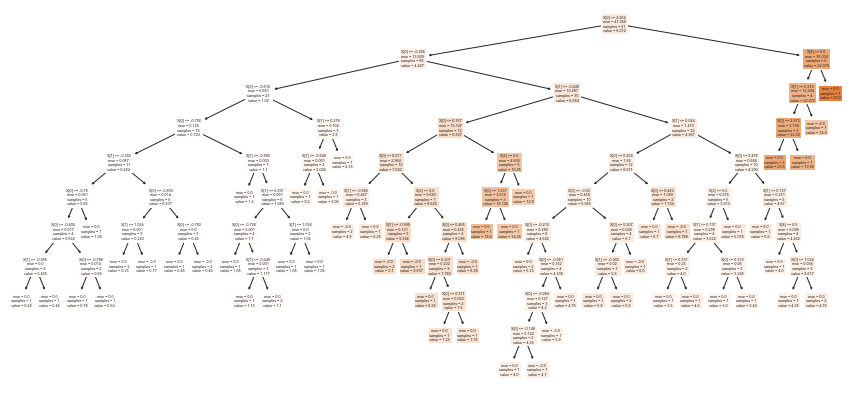

In [28]:
df=dr.fit(x_test,y_pred)
plt.figure(figsize=(15,7))
plot_tree(df,filled=True)

# Random Forest Regressor Model

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)

R_squared : 0.9120922913680564


In [30]:
def prediction(PresentPrice, CarAge, FuelType,SellerType, Transmissionmanual):
    # feature scaling on present price and car age
    scaled_value = scaler.transform([[float(PresentPrice), int(CarAge)]])
    
    price = scaled_value[0,0]
    age = scaled_value[0,1]
    
    fuel = int(FuelType)
    Seller = int(SellerType)
    trans = int(Transmissionmanual)
    
    return rf.predict([[price, age, fuel, Seller, trans]])
prediction(25, 14, 0, 2, 0)

array([13.1333])

In [31]:
prediction(23.73, 14, 0, 1,0)

array([5.3799])

# Conclusions:

* Present price of a car plays an important role in predicting Selling Price, One increases the other gradually increases.
* Car age is effecting negatively as older the car lesser the Selling Price.
* Selling Price of cars with Fuel type Diesel is higher.
* Car of Manual type is of less priced whereas of Automatic type is high.
* Cars sold by Individual tend to get less Selling Price when sold by Dealers.

In [32]:
prediction(40.63,15,1,0,1)

array([23.3884])